In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sotodlib import core
import sotodlib.io.load as io_load

from moby2.analysis import socompat
socompat.register_loaders()

import tools

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sotodlib.core import FlagManager

import sotodlib.flags as flags
import sotodlib.sim_flags as sim_flags

import sotodlib.tod_ops.filters as filters

from sotodlib.tod_ops import fourier_filter, rfft, detrend_data

In [3]:
import tools
import importlib
importlib.reload(tools)
from tools import in_range

In [83]:
def old_test_glitch(tod, signal_name):
        Found_Lenth = 0
        Found_Sum = 0
        
        true = tod.flags.true_glitches
        found = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True).ranges
        
        for det in range(tod.dets.count):
            
            print('det:', det)
            true_ranges = true[det].ranges()
            true_positions = [i[0] for i in true_ranges]
   
            found_ranges = found[det].ranges()

            true_found = in_range(true_positions, found_ranges)
            
            if 1:
                if len(true_found) == 0:
                    true_positive_rate = 'no glitch found'
                else:
                    true_positive_rate = sum(true_found)/len(true_found)
                
                if len(true_positions) == 0:
                    detection_rate = 'no glitch is added'
                else:
                    detection_rate  = sum(true_found)/len(true_positions)
                    
                print(true_ranges)
                #print('positions: ', true_glitches_positions)
                print(found_ranges)
                print('results:', true_found) 
                print('true_positive_rate:', true_positive_rate)
                print('detection rate:', detection_rate)
                print('\n')
        
            
            Found_Lens  = Found_Lenth + len(true_found)
            Found_Sum  = Found_Sum + sum(true_found)
            
            True_Positive_Rate = Found_sum/Found_Lenth
            #Detection_Rate = Found_Sum/
            
        return True_Positive_Rate

In [ ]:
def test_glitch(tod):
    found_glitches = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True).ranges
    true_glitches = tod.flags.true_glitches
    
    found_glitches_ranges2D = np.vstack([r.mask() for r in found_glitches])
    true_glitches_ranges2D = np.vstack(r.mask() for r in true_glitches)
    
    result = found_glitches_ranges2D*true_glitches_ranges2D
    
    if 1:
        for i in range(tod.dets.count):
            true = tod.flags.true_glitches[i]
            true.ranges()
    
    
            found = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True).ranges[i]
            found.ranges()
        
            results = true.mask()*found.mask()
            print('det:', i)
            print(true.ranges())
            print(found.ranges())
            print('1:', np.sum(true.mask()))
            print('2:', found.ranges().size/2)
            print('3:', np.sum(results))
            print('\n')
    
    true_sum = true_glitches_ranges2D.sum()
    found_sum = sum([mr.ranges().size/2 for mr in found_glitches])
    found_true_sum = result.sum()
    
    
    detection_rate = found_true_sum/true_sum
    
    
    true_positive_rate = found_true_sum/found_sum
    false_positive_rate = 1 - true_positive_rate
    
    return detection_rate, true_positive_rate, false_positive_rate

In [171]:
def test_glitch(tod):
    found_glitches = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True).ranges
    true_glitches = tod.flags.true_glitches
    
    found_glitches_ranges2D = np.vstack([r.mask() for r in found_glitches])
    true_glitches_ranges2D = np.vstack(r.mask() for r in true_glitches)
    
    result = found_glitches_ranges2D*true_glitches_ranges2D
    
    if 1:
        for i in range(tod.dets.count):
            true = tod.flags.true_glitches[i]
            true.ranges()
    
    
            found = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True).ranges[i]
            found.ranges()
        
            results = true.mask()*found.mask()
            print('det:', i)
            print(true.ranges())
            print(found.ranges())
            print('1:', np.sum(true.mask()))
            print('2:', found.ranges().size/2)
            print('3:', np.sum(results))
            print('\n')
    
    true_sum = true_glitches_ranges2D.sum()
    found_sum = sum([mr.ranges().size/2 for mr in found_glitches])
    found_true_sum = result.sum()
    
    detection_rate = found_true_sum/true_sum
    
    
    true_positive_rate = found_true_sum/found_sum
    false_positive_rate = 1 - true_positive_rate
    
    return detection_rate, true_positive_rate, false_positive_rate

In [176]:
obs_num1, obs_num2 = 0, 3
obs_num = obs_num2 - obs_num1

det_set_num1, det_set_num2 = 1, 2
det_set_num = det_set_num2 - det_set_num1

det_num1, det_num2 = 0,10
det_num = det_num2 - det_num1

n_glitch = 2
heights = np.arange(1, 5, 1)
signal_name = 'bad_signal'

# Choose observation
nersc_todsims = '/global/project/projectdirs/sobs/todsims/pipe-s0001/v4/context.yaml'
context = core.Context(nersc_todsims)
my_obs_list = context.obsdb.get()[obs_num1:obs_num2]

In [179]:
my_obs_list[0]
tod_num = obs_num * det_set_num
tod_num

3

In [178]:
True_Positive_Rate_Matrix = []
Detection_Rate_Matrix= []

for my_obs in my_obs_list:
    print('\n')
    det_set_list = context.obsfiledb.get_detsets(my_obs['obs_id'])[det_set_num1:det_set_num2]
    print(my_obs['obs_id'])
    
    for det_set in det_set_list:
        print(det_set)
        dets = context.obsfiledb.get_dets(det_set)
        tod = context.get_obs(my_obs, dets=dets[det_num1:det_num2])
       # Trim tod
        tsamp = np.median(np.diff(tod.timestamps))
        n_cut = int(10//tsamp)
        #print('Trimming in time...')
        tod.restrict('samps', (n_cut, tod.samps.count-n_cut))
        
        True_Positive_Rate = []
        False_Positive_Rate = []
        Detection_Rate = []


        for height in heights:
            print('height:', height)
            if 'badness' in tod:
                tod.move('badness', None)
            # add glitches
            sim_flags.add_random_glitches(tod, params={'n_glitch':n_glitch, 'sig_n_glitch' : 0,'h_glitch':height}, signal='badness', overwrite='True')

            if signal_name in tod:
                tod.move(signal_name, None)
            # add the glitches to the tod
            tod.wrap(signal_name, tod.signal+tod.badness, [(0, tod.dets), (1, tod.samps)])
        
            # method 
            detection_rate, true_positive_rate, false_positive_rate = test_glitch(tod)
            True_Positive_Rate.append(true_positive_rate)
            Detection_Rate.append(detection_rate)
        
            True_Positive_Rate_Matrix.append(True_Positive_Rate)
            Detection_Rate_Matrix.append(Detection_Rate)

True_Positive_Rate_Matrix = np.array(True_Positive_Rate_Matrix)
Detection_Rate_Matrix = np.array(Detection_Rate_Matrix)



CES-Atacama-LAT-Tier1DEC-035..-045_RA+040..+050-0-0_LF
LF2_tube_LT6
height: 1
det: 0
[[22477 22478]]
[[22250 22694]]
1: 1
2: 1.0
3: 1


det: 1
[[40635 40636]]
[[40414 40863]]
1: 1
2: 1.0
3: 1


det: 2
[[48744 48745]]
[[48518 48966]]
1: 1
2: 1.0
3: 1


det: 3
[[13072 13073]
 [26206 26207]
 [27482 27483]]
[[12850 13299]
 [25985 26429]
 [27261 27705]]
1: 3
2: 3.0
3: 3


det: 4
[[ 2054  2055]
 [ 4621  4622]
 [ 5589  5590]
 [29067 29068]
 [31521 31522]]
[[ 1827  2276]
 [ 4395  4844]
 [ 5363  5811]
 [28840 29288]
 [31300 31743]]
1: 5
2: 5.0
3: 5




/global/common/software/cmb/cori/cmbenv-gcc_20200614/cmbenv_python/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


det: 5
[[ 8702  8703]
 [ 9622  9623]
 [22669 22670]]
[[ 8482  8923]
 [ 9401  9844]
 [22443 22891]]
1: 3
2: 3.0
3: 3


det: 6
[[ 2614  2615]
 [49704 49705]]
[[ 2393  2837]
 [49484 49926]]
1: 2
2: 2.0
3: 2


det: 7
[[38594 38595]
 [47347 47348]]
[[38366 38816]
 [47126 47575]]
1: 2
2: 2.0
3: 2


det: 8
[]
[]
1: 0
2: 0.0
3: 0


det: 9
[[13898 13899]
 [16096 16097]]
[[13670 14121]
 [15869 16318]]
1: 2
2: 2.0
3: 2


height: 2
det: 0
[[28876 28877]
 [32760 32761]
 [35017 35018]]
[[28630 29135]
 [32509 33043]
 [34773 35269]]
1: 3
2: 3.0
3: 3


det: 1
[]
[]
1: 0
2: 0.0
3: 0


det: 2
[[11903 11904]
 [13997 13998]
 [40092 40093]]
[[11659 12167]
 [13740 14249]
 [39852 40339]]
1: 3
2: 3.0
3: 3


det: 3
[[47986 47987]]
[[47735 48244]]
1: 1
2: 1.0
3: 1


det: 4
[[42013 42014]]
[[41737 42259]]
1: 1
2: 1.0
3: 1


det: 5
[[ 1940  1941]
 [19150 19151]]
[[ 1682  2187]
 [18893 19402]]
1: 2
2: 2.0
3: 2


det: 6
[[37030 37031]
 [37639 37640]]
[[36773 37270]
 [37394 37890]]
1: 2
2: 2.0
3: 2


det: 7
[[28978 2

In [170]:
True_Positive_Rate_Matrix[3]

array([1.01010101, 1.0230179 , 1.03359173, 1.02564103])

height: 1
Method 1


/global/common/software/cmb/cori/cmbenv-gcc_20200614/cmbenv_python/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


height: 2
Method 1
height: 3
Method 1
height: 4
Method 1
height: 5
Method 1
height: 6
Method 1
height: 7
Method 1
height: 8
Method 1
height: 9
Method 1


Text(0, 0.5, 'Ratio')

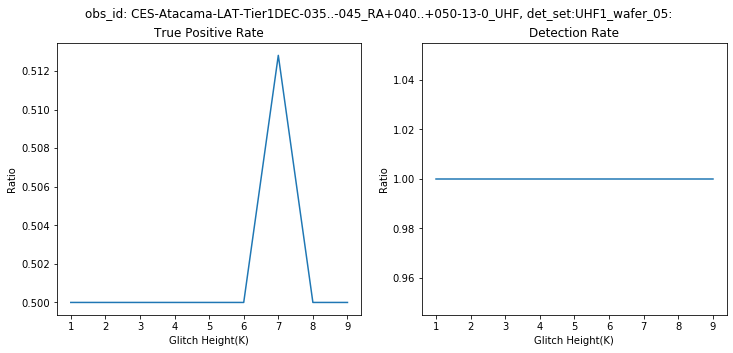

In [130]:
obs_num = 300
det_set_num = 5
det_num1, det_num2 = 0,10
det_num = det_num2 - det_num1
n_glitch = 2
heights = np.arange(1, 10, 1)
signal_name = 'bad_signal'

# Choose observation
nersc_todsims = '/global/project/projectdirs/sobs/todsims/pipe-s0001/v4/context.yaml'
context = core.Context(nersc_todsims)
obs_list = context.obsdb.get()
my_obs = obs_list[obs_num]

# Choose det_set
det_sets = context.obsfiledb.get_detsets(my_obs['obs_id'])
det_set = det_sets[det_set_num]

# Choose  dets from a det_set
dets = context.obsfiledb.get_dets(det_set)

# Get tod of the dets chosen
tod = context.get_obs(my_obs, dets=dets[det_num1:det_num2])

# Trim tod
tsamp = np.median(np.diff(tod.timestamps))
n_cut = int(10//tsamp)
#print('Trimming in time...')
tod.restrict('samps', (n_cut, tod.samps.count-n_cut))
#print('The TOD now has {} samples'.format(tod.samps.count))

True_Positive_Rate1 = []
False_Positive_Rate1 = []
Detection_Rate1 = []

True_Positive_Rate2 = []
False_Positive_Rate2 = []
Detection_Rate2 = []


for height in heights:
        print('height:', height)
        if 'badness' in tod:
            tod.move('badness', None)
        # add glitches
        sim_flags.add_random_glitches(tod, params={'n_glitch':n_glitch, 'sig_n_glitch' : 0,'h_glitch':height}, signal='badness', overwrite='True')

        if signal_name in tod:
            tod.move(signal_name, None)
        # add the glitches to the tod
        tod.wrap(signal_name, tod.signal+tod.badness, [(0, tod.dets), (1, tod.samps)])
        
        # method 1
        print('Method 1')
        detection_rate1, true_positive_rate1, false_positive_rate1 = test_glitch(tod)
        True_Positive_Rate1.append(true_positive_rate1)
        Detection_Rate1.append(detection_rate1)
        
        # method2
        #print('Method 2')
        #detection_rate2, true_positive_rate2 = old_test_glitch(tod)
        #True_Positive_Rate2.append(true_positive_rate2)
        #Detection_Rate2.append(detection_rate2)
        
        
fig, ax = plt.subplots(1, 2,figsize=(12,5))
plt.suptitle('obs_id: %s, det_set:%s: ' %(my_obs['obs_id'], det_set))

ax[0].plot(heights, True_Positive_Rate1)
ax[0].set_title('True Positive Rate')
ax[0].set_xlabel('Glitch Height(K)')
ax[0].set_ylabel('Ratio')

ax[1].plot(heights, Detection_Rate1)
ax[1].set_title('Detection Rate')
ax[1].set_xlabel('Glitch Height(K)')
ax[1].set_ylabel('Ratio')



#plt.savefig('./plots/%s.png' %(det_set))
#plt.savefig('./plots/%s.png' %(det_set))

height: 1
det: 0
glitch ranges [[22135 22136]
 [26208 26209]]
positions:  [22135, 26208]
ranges: [[21909 22364]
 [25981 26430]
 [41002 41419]]
results: [1 1 0]
true_positive_rate: 0.6666666666666666
detection rate: 1.0


det: 1
glitch ranges [[22021 22022]
 [34898 34899]]
positions:  [22021, 34898]
ranges: [[21800 22243]
 [34677 35120]
 [41001 41404]]
results: [1 1 0]
true_positive_rate: 0.6666666666666666
detection rate: 1.0


height: 2
det: 0
glitch ranges [[6446 6447]
 [9691 9692]]
positions:  [6446, 9691]
ranges: [[ 6195  6691]
 [ 9446  9943]
 [41002 41419]]
results: [1 1 0]
true_positive_rate: 0.6666666666666666
detection rate: 1.0


det: 1
glitch ranges [[15344 15345]
 [36812 36813]]
positions:  [15344, 36812]
ranges: [[15092 15632]
 [36572 37070]
 [41001 41404]]
results: [1 1 0]
true_positive_rate: 0.6666666666666666
detection rate: 1.0


height: 3
det: 0
glitch ranges [[13008 13009]]
positions:  [13008]
ranges: [[12738 13296]
 [41002 41419]]
results: [1 0]
true_positive_rate: 0

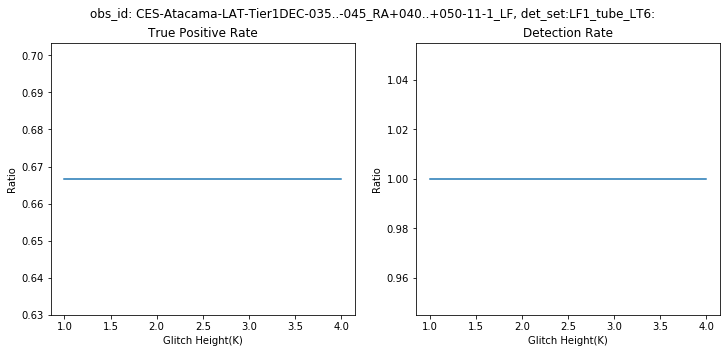

In [46]:
True_Positive_Rate = []
False_Positive_Rate = []
Ratio_Glitches_Found = []

for i, height in enumerate(heights):
    found_glitches_lens = 0
    found_glitches_sum = 0
    
    print('height:', height)
    if 'badness' in tod:
        tod.move('badness', None)
    # add glitches
    sim_flags.add_random_glitches(tod, params={'n_glitch':n_glitch, 'sig_n_glitch' : 0,'h_glitch':height}, signal='badness', overwrite='True')

    if signal_name in tod:
        tod.move(signal_name, None)
    # add the glitches to the tod
    tod.wrap(signal_name, tod.signal+tod.badness, [(0, tod.dets), (1, tod.samps)])

    found_glitches = flags.get_glitch_flags(tod, signal=signal_name, overwrite=True)

    
    for det in range(tod.dets.count):
        print('det:', det)
        true_glitches_arrays = tod.flags.true_glitches[det].ranges()
        true_glitches_positions = [i[0] for i in true_glitches_arrays]
   
        found_glitches_ranges = found_glitches[det].ranges()

        results = in_range(true_glitches_positions, found_glitches_ranges)
            
        if 1:
            if len(results) == 0:
                true_positive_rate = 'no glitch found'
            else:
                true_positive_rate = sum(results)/len(results)
                
            if len(true_glitches_positions) == 0:
                ratio_glitches_found = 'no glitch is added'
            else:
                ratio_glitches_found  = sum(results)/len(true_glitches_positions)
                print('glitch ranges', true_glitches_arrays)
                print('positions: ', true_glitches_positions)
                print('ranges:',found_glitches_ranges)
                print('results:', results) 
                print('true_positive_rate:', true_positive_rate)
                print('detection rate:', ratio_glitches_found)
                print('\n')
        

        found_glitches_lens  = found_glitches_lens + len(results)
        found_glitches_sum  = found_glitches_sum + sum(results)
    
    True_Positive_Rate.append(found_glitches_sum/found_glitches_lens)
    Ratio_Glitches_Found.append(found_glitches_sum/(det_num*n_glitch))
    
        
print('\n')
print('obs_id: ', my_obs['obs_id'])
print('det_set: ', det_set)
print('%s dets: %s' %(det_num, dets[det_num1:det_num2]))
print('total glitches: ', det_num*n_glitch)
#print('glitch height: %sK' %height)
#print('total true positive rate: ', found_glitches_sum/found_glitches_lens)
#print('total ratio glitches found: ', found_glitches_sum/(det_num*n_glitch))

fig, ax = plt.subplots(1, 2,figsize=(12,5))
plt.suptitle('obs_id: %s, det_set:%s: ' %(my_obs['obs_id'], det_set))

ax[0].plot(heights, True_Positive_Rate)
ax[0].set_title('True Positive Rate')
ax[0].set_xlabel('Glitch Height(K)')
ax[0].set_ylabel('Ratio')

ax[1].plot(heights, Ratio_Glitches_Found)
ax[1].set_title('Detection Rate')
ax[1].set_xlabel('Glitch Height(K)')
ax[1].set_ylabel('Ratio')

plt.savefig('./plots/%s.png' %(det_set))